# Import libs

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt 

# Import data

In [2]:
path = "../data/part_10.csv"

In [3]:
df = pd.read_csv(path)

# Look brief at data

<Axes: >

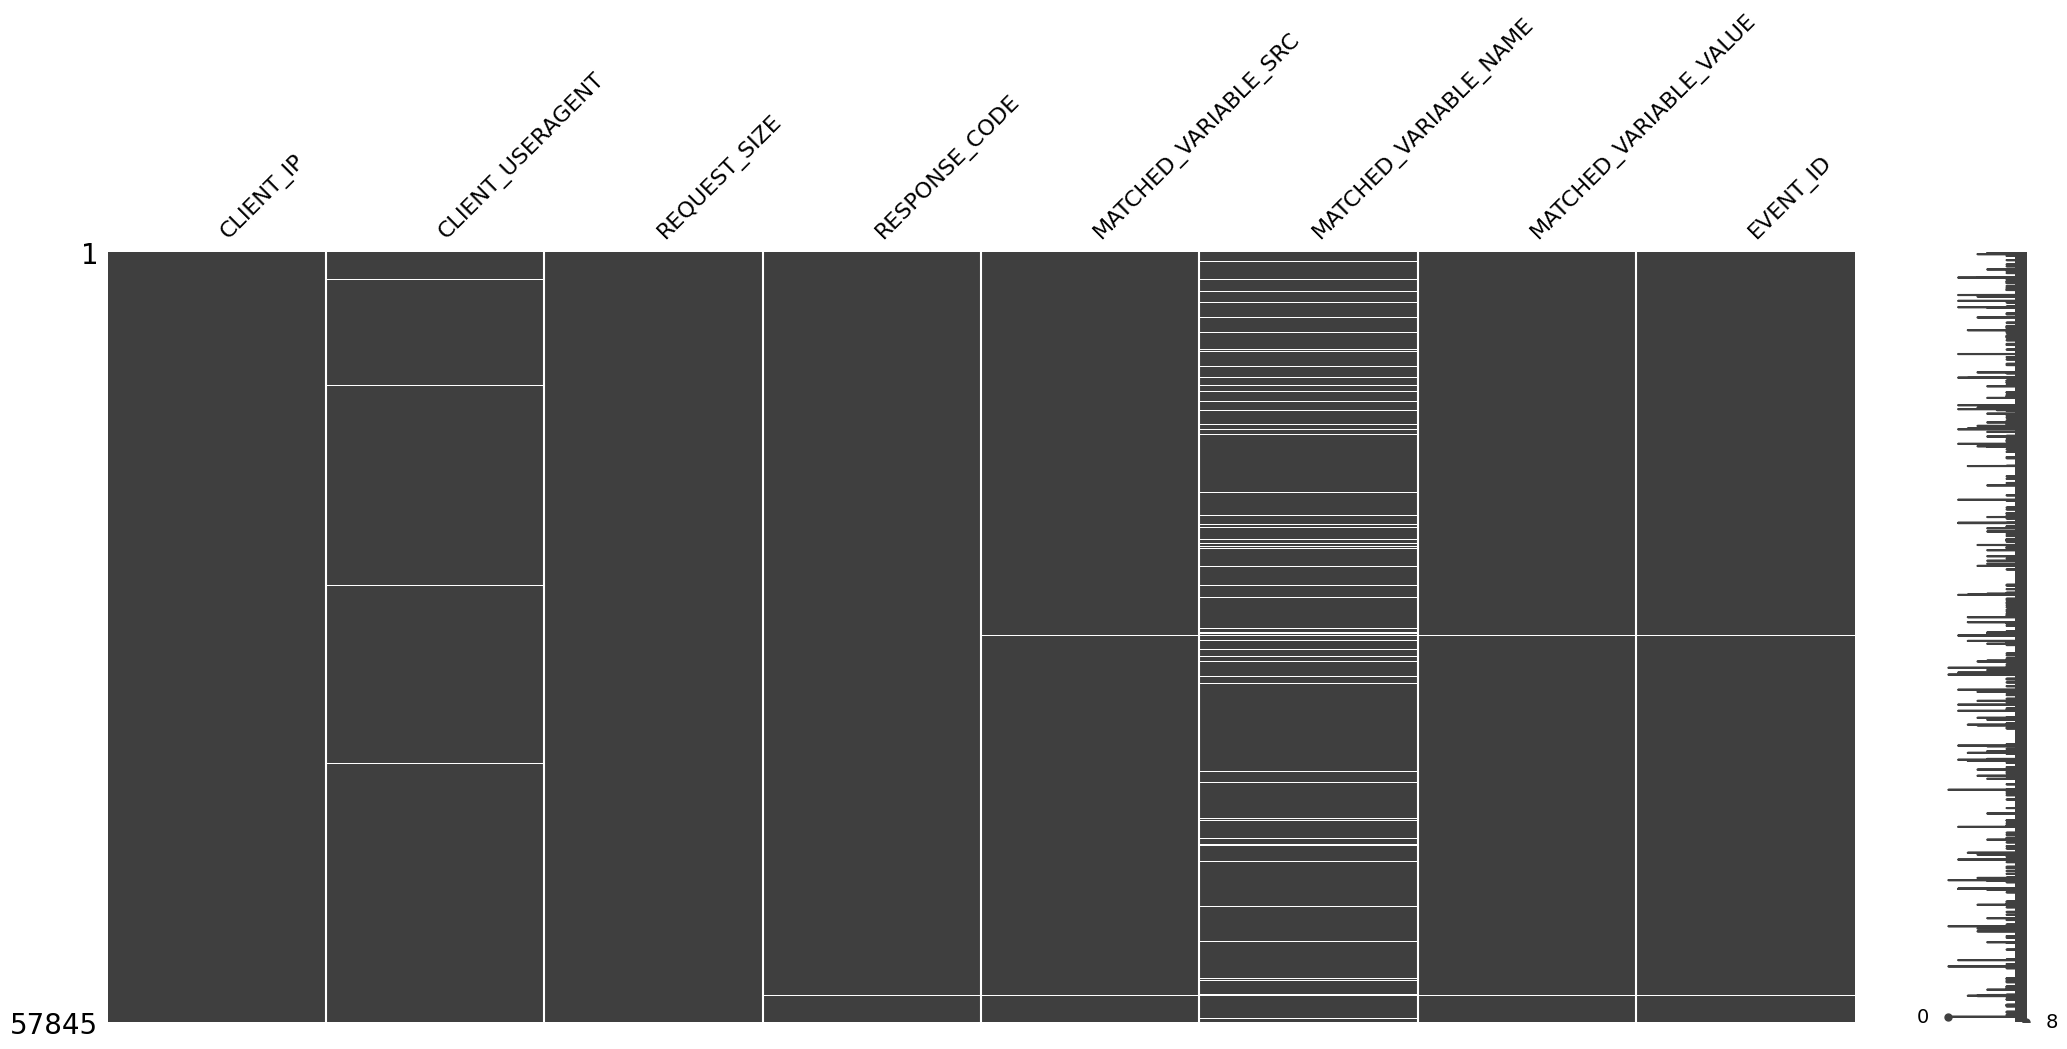

In [4]:
%matplotlib inline
msno.matrix(df)

In [5]:
# 'Mozilla'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57845 entries, 0 to 57844
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CLIENT_IP               57838 non-null  object
 1   CLIENT_USERAGENT        57517 non-null  object
 2   REQUEST_SIZE            57794 non-null  object
 3   RESPONSE_CODE           57770 non-null  object
 4   MATCHED_VARIABLE_SRC    57730 non-null  object
 5   MATCHED_VARIABLE_NAME   53167 non-null  object
 6   MATCHED_VARIABLE_VALUE  57683 non-null  object
 7   EVENT_ID                57666 non-null  object
dtypes: object(8)
memory usage: 3.5+ MB


In [7]:
df.describe()

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID
count,57838,57517,57794,57770,57730,53167,57683,57666
unique,24940,6992,5758,60,21,3209,57611,54410
top,217.175.140.69,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,259,200,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,"{\""tags\"":[{\""sizes\"":[{\""width\"":728,\""height...",cr1nJWQB5cBXmMW1hh_4
freq,11286,2117,261,25771,20812,11165,28,7


In [8]:
df.columns

Index(['CLIENT_IP', 'CLIENT_USERAGENT', 'REQUEST_SIZE', 'RESPONSE_CODE',
       'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME',
       'MATCHED_VARIABLE_VALUE', 'EVENT_ID'],
      dtype='object')

# EDA

#### Check total requests per ip

In [9]:
print(f'Amount of values where pattern strange: {df.shape[0] - df["CLIENT_IP"].str.contains("(.*.*)").sum()}')

Amount of values where pattern strange: 7


/tmp/ipykernel_167657/1869043605.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(f'Amount of values where pattern strange: {df.shape[0] - df["CLIENT_IP"].str.contains("(.*.*)").sum()}')


In [10]:
df[df['CLIENT_IP'].str.contains("(.*.*)") != True]

/tmp/ipykernel_167657/2849963048.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['CLIENT_IP'].str.contains("(.*.*)") != True]


,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID
31235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#### delete all rows where CLIENT_IP is NaN
df = df.dropna(axis=0, how='all').reset_index(drop=True)

In [12]:
unique_ip_array = df['CLIENT_IP'].unique()

In [13]:
count_ip_requests_per_ip = [df[df['CLIENT_IP'] == ip_address]['CLIENT_USERAGENT'].shape[0] for ip_address in unique_ip_array]

In [14]:
total_request_per_ip_df = pd.DataFrame(data=np.array([unique_ip_array, count_ip_requests_per_ip]).T, columns=['CLIENT_IP','count_number_of_requests'])

In [15]:
total_request_per_ip_df.sort_values(by='count_number_of_requests', ascending=False)

,CLIENT_IP,count_number_of_requests
11,217.175.140.69,11286
192,37.46.129.136,771
18,188.43.52.163,767
62,5.143.231.38,757
57,192.168.100.63,748
...,...,...
10170,85.26.232.159,1
10169,188.162.192.161,1
10168,178.70.94.21,1
10167,168.235.196.230,1


In [23]:
# total_request_per_ip_df.to_parquet('../data/total_request_per_ip_df.parquet') ##pyarrow

#### Check Client User agent column

In [24]:
print('Amount of values where pattern HEADER seems strange:', df.shape[0] - df["CLIENT_USERAGENT"].str.contains("([a-zA-Z]/[\d].*_*)").sum())

Amount of values where pattern HEADER seems strange: 3819


/tmp/ipykernel_167657/946861042.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print('Amount of values where pattern HEADER seems strange:', df.shape[0] - df["CLIENT_USERAGENT"].str.contains("([a-zA-Z]/[\d].*_*)").sum())


In [25]:
bot_value = df["CLIENT_USERAGENT"].apply(lambda row: False if type(row) is not str else False if 'bot' not in row.lower() else True).sum()

In [26]:
print('Amount of values where pattern include bot in HEADER:', bot_value)

Amount of values where pattern include bot in HEADER: 5785


#### save new information to dataframe

In [27]:
df['HEADER_pattern'] = df["CLIENT_USERAGENT"].str.contains("([a-zA-Z]/[\d].*_*)").fillna(False)

/tmp/ipykernel_167657/1930889726.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['HEADER_pattern'] = df["CLIENT_USERAGENT"].str.contains("([a-zA-Z]/[\d].*_*)").fillna(False)


In [28]:
df['BOT_BOOL'] = df["CLIENT_USERAGENT"].apply(lambda row: False if type(row) is not str else False if 'bot' not in row.lower() else True).fillna(False)

### check REQUEST_SIZE

#### take a slice of dataframe where request size are > 0

In [29]:
df = df[df['REQUEST_SIZE'].apply(lambda row: True if type(row) == float else row.isnumeric())].reset_index(drop=True)

In [34]:
df['REQUEST_SIZE'] = df['REQUEST_SIZE'].apply(lambda x: int(x))

In [ ]:
print(df.shape)

### check any float values in CLIENT USERAGENT column and take a slice

In [31]:
df = df[~df['CLIENT_USERAGENT'].apply(lambda x: True if type(x) == float else True if type(x) == int else False)]

#### check that CLIENT has curl HEAD

In [37]:
df['CURL_HEAD_BOOL'] = df['CLIENT_USERAGENT'].apply(lambda x: True if 'curl' in x.lower() else False)
df['WGET_HEAD_BOOL'] = df['CLIENT_USERAGENT'].apply(lambda x: True if 'wget' in x.lower() else False)

### check RESPONSE_CODE column

In [38]:
# save only numbers for RESPONSE_CODE column
df = df[df['RESPONSE_CODE'].apply(lambda x: x.isnumeric() if type(x) != float else True if x == float else False)]

In [39]:
df.head()

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID,HEADER_pattern,BOT_BOOL,CURL_HEAD_BOOL,WGET_HEAD_BOOL
1,93.158.215.131,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,431,302,REQUEST_GET_ARGS,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp,True,False,False,False
2,176.123.240.64,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,395,403,REQUEST_PATH,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U,True,False,False,False
3,73.78.81.63,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,387,302,REQUEST_GET_ARGS,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2,True,False,False,False
4,66.102.9.44,Mozilla/5.0 (Linux; Android 4.4.2; GT-N7100 Bu...,1733,404,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp,True,False,False,False
5,79.183.87.247,Mozilla/5.0 (Linux; Android 6.0; LG-H815 Build...,682,404,REQUEST_HEADERS,REQUEST_HEADERS.User-Agent,Mozilla/5.0 (Linux; Android 6.0; LG-H815 Build...,nFzwHGQB5cBXmMW1y_TD,True,False,False,False


In [40]:
df['RESPONSE_CODE'] = df['RESPONSE_CODE'].apply(lambda x: int(x))

In [41]:
df = df.reset_index(drop=True)

## GO deeper to CLIENT_USERAGENT

#### First. Check what kind of app users has been used.

In [42]:
user_agent_copy = df[['CLIENT_USERAGENT']].copy()

In [43]:
list_of_unique_app = sorted(user_agent_copy['CLIENT_USERAGENT'].apply(lambda x: x.split()[0]).unique(), reverse=True)

In [44]:
print(len(list_of_unique_app))

732


In [45]:
len_of_unique_name_app = [[len(x), x] for x in list_of_unique_app]

In [46]:
sorted(len_of_unique_name_app, reverse=True)

[[365,
  '@z2T7AUYkzLD6LVaVAmkdOEq3zsjbA20jCYBd-fNOpeOUkusmDN7jU2lTD5J8rgH-7sxrRc4qbWGWEDHJjrzjkCRflPe-J-tuAUjwBuZ153UVyvh9cvIqIF6ABelKSDPBM6JvRLEt0wYQpHZjhJbF0Tuv_1bg60OWY4SPvc1XeeDEeRZ_U27S64u04qtlObchIMbh9iU_mXDdqUzTwaXe37zqCvvrvV7nXnhvWNzp8lwn21DBbsTAAEFd1gVHgTHOsjNiGpcLwr9SdaJj3U1jHzjGb8PLCb8eOhxkzOkCQJRK9mrvcxS-FWMsLWznRoeTFDg1VDxlkiosVr-YiCYb30w-fDOrqpscWtuVn_liHFB='],
 [365,
  '@y9OB0XIbxr35uyGPPLayO8zT4enrIh2ZKT3bIXjwwTYw2BW8tmVq6rsFcENaAPxnleEoyTMtZaXjAY5djfLiaZ8RCCN9MqHuzdjlA5hAVb89jCTmyurBDeIJ4pvNroi5L8ZKTQjQioG0qY61CCQSTvy3SUdk9yi6XSzMUGBZZVIZ837AkbRF_3dFFreh2cXPyyTGI6YMVNpjwVGaiBOasq5M2GwYTDkY3gkSUBI7zAXraIBrct4NpgtSZkq7qMVCzbGou-Boyvj8Ww9Ozx0LBkWrjBXW2tcYy9-PaAiFom0dMEi1ZPdSEH_COU1Sp5LNSkFsk08QGxXk5T1KB--BPLlx-dRHtSex0uT6MB29v2B='],
 [365,
  '@xJirdIGUjBGlYN0yotgqOgKIrWVtD1oqqkZh6ismhuHewt-Hazd3InxoruugxgQPF7JAm8v12byFilqihjRco75KU5XYUJzzLoUkS4urJMX_kfTZ-Bny9ZQuukpVagKhASHgKt5iRPXOw9NAvpFHWbNGl0X_kfLPphkiyBrlZGdak1nOZ46Ww2RiOA0e3MCcyJYTLRDwWJThS09xKVQ2gwY22flPu3pQt28QV-s

#### Note:
     [61, '*BAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0AAAAAAAAAAAAA='],
     [53, "nessus='%2Bconvert(int,convert(varchar%2C0x7b5d))%2B'"],
     [51, '\\";print(md5(acunetix_wvs_security_test));$a=\\"\\"\\"'],
     [42, 'MICROSOFT_DEVICE_METADATA_RETRIEVAL_CLIENT'],
     [40, 'com.lenovo.leos.appstore/9.4.0.88(Lenovo'],

    Here it seems that we need to set top limit name app with value 50.

     [9, 'Opera/3.6'],
     [9, 'Microsoft'],
     [9, 'LiveZilla'],
     [9, 'CCBot/2.0'],
     [9, '&quot;|ls'],
     [8, 'Virusdie'],
     [7, 'ut_core'],
     [7, "\\'UNION"],
     [7, 'XML-RPC'],
     [7, 'Samsung'],
     [7, 'Riddler'],
     [7, 'Navicat'],
     [7, 'Mozilla'],
     [7, 'MegaFon'],
     [7, 'Linguee'],
     [7, 'Jetpack'],
     [7, 'GWallet'],
     [7, 'Android'],
     [6, '{${`ls'],
     [6, 'bhcBot'],
     [6, 'YOURLS'],

     Moreover, it seems like we need to set minimum limit with value >= 9

    

In [47]:
df['LENGTH_DISCRET_APP'] = df['CLIENT_USERAGENT'].apply(lambda x: 'Anomaly TOP' if len(x.split()[0]) > 50 else 'user_expected' if len(x.split()[0]) >= 9 else 'Anomaly MIN')

In [48]:
df.head()

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID,HEADER_pattern,BOT_BOOL,CURL_HEAD_BOOL,WGET_HEAD_BOOL,LENGTH_DISCRET_APP
0,93.158.215.131,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,431,302,REQUEST_GET_ARGS,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp,True,False,False,False,user_expected
1,176.123.240.64,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,395,403,REQUEST_PATH,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U,True,False,False,False,user_expected
2,73.78.81.63,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,387,302,REQUEST_GET_ARGS,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2,True,False,False,False,user_expected
3,66.102.9.44,Mozilla/5.0 (Linux; Android 4.4.2; GT-N7100 Bu...,1733,404,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp,True,False,False,False,user_expected
4,79.183.87.247,Mozilla/5.0 (Linux; Android 6.0; LG-H815 Build...,682,404,REQUEST_HEADERS,REQUEST_HEADERS.User-Agent,Mozilla/5.0 (Linux; Android 6.0; LG-H815 Build...,nFzwHGQB5cBXmMW1y_TD,True,False,False,False,user_expected


#### check that we have @ symbol in CLIENT_USERAGENT HEAD

In [49]:
df['SYMBOL_@'] = df['CLIENT_USERAGENT'].apply(lambda x: True if '@' in x.split(' ')[0] else False)

#### check which platform user has been used for some random requests

In [50]:
for user_agent_head in df['CLIENT_USERAGENT'].sample(15):
    print(user_agent_head.split(' '))
    print(len(user_agent_head.split(' ')))
#"Linux", 'Windows", "iPhone", "Macintosh", "iPad", "compatible"

['Mozilla/5.0', '(Linux;', 'Android', '5.1.1;', 'Redmi', 'Note', '3', 'Build/LMY47V)', 'AppleWebKit/537.36', '(KHTML,', 'like', 'Gecko)', 'Chrome/63.0.3239.111', 'Mobile', 'Safari/537.36']
15
['Mozilla/5.0', '(Windows', 'NT', '10.0;', 'WOW64;', 'Trident/7.0;', 'rv:11.0)', 'like', 'Gecko']
9
['Mozilla/5.0', '(compatible;', 'AhrefsBot/5.1;', '+http://ahrefs.com/robot/)']
4
['ut_core', 'BenchHttp', '(ver:44332)']
3
['Mozilla/5.0', '(Windows', 'NT', '6.1;', 'Win64;', 'x64)', 'AppleWebKit/537.36', '(KHTML,', 'like', 'Gecko)', 'Chrome/63.0.3239.132', 'Safari/537.36']
12
['Mozilla/5.0', '(Windows', 'NT', '6.1;', 'rv:54.0)', 'Gecko/20100101', 'Firefox/54.0']
7
['Mozilla/5.0', '(Macintosh;', 'Intel', 'Mac', 'OS', 'X', '10_12)', 'AppleWebKit/602.1.50', '(KHTML,', 'like', 'Gecko)', 'Version/10.0', 'Safari/602.1.50']
13
['Mozilla/5.0', '(Windows', 'NT', '10.0;', 'WOW64;', 'Trident/7.0;', 'rv:11.0)', 'like', 'Gecko']
9
['Mozilla/5.0', '(Windows', 'NT', '10.0;', 'Win64;', 'x64)', 'AppleWebKit/537.36

In [51]:
list_of_len_splited_user_agent_head = sorted([[len(user_agent_head.split(' ')), user_agent_head.split(' ')]for user_agent_head in df['CLIENT_USERAGENT']], reverse=True)

In [52]:
list_of_len_splited_user_agent_head[-6059:-6040]
# Note: here it sems that len 4 is minimum for border with strange HEAD

[[4, ['Lotus', 'Traveler', 'Android', '9.0']],
 [4, ['Lotus', 'Traveler', 'Android', '9.0']],
 [4, ['Lotus', 'Traveler', 'Android', '9.0']],
 [4, ['Lotus', 'Traveler', 'Android', '9.0']],
 [4, ['Lotus', 'Traveler', 'Android', '8.5.3']],
 [4, ['Linguee', 'Bot', '(http://www.linguee.com/bot;', 'bot@linguee.com)']],
 [4,
  ['Jigsaw/2.3.0',
   'W3C_CSS_Validator_JFouffa/2.0',
   '(See',
   '<http://validator.w3.org/services>)']],
 [4,
  ['Feedly/1.0',
   '(+http://www.feedly.com/fetcher.html;',
   'like',
   'FeedFetcher-Google)']],
 [4, ['BOINC', 'client', '(windows_x86_64', '7.8.3)']],
 [4, ['Akamai', 'NetSession', 'Interface', '(83a441e;win;1.9.5.5;Win7)']],
 [4, ['2ip.ru', 'CMS', 'Detector', '(http://2ip.ru/cms/)']],
 [4, ["-1\\'", 'OR', '2+866-866-1=0+0+0+1', '--']],
 [4, ["-1\\'", 'OR', '2+842-842-1=0+0+0+1', '--']],
 [4, ["-1\\'", 'OR', '2+807-807-1=0+0+0+1', '--']],
 [4, ["-1\\'", 'OR', '2+657-657-1=0+0+0+1', '--']],
 [4, ["-1\\'", 'OR', '2+445-445-1=0+0+0+1', '--']],
 [4, ["-1\\'"

#### create new column which take into account length of splited

In [53]:
# [[len(user_agent_head.split(' ')), user_agent_head.split(' ')]for user_agent_head in df['CLIENT_USERAGENT']]

In [54]:
df['LENGTH_OF_USER_AGENT_HEAD_likely'] = df['CLIENT_USERAGENT'].apply(lambda x: True if len(x.split(' ')) >= 4 else False)

#### Create some more features based on CLIENT_USERAGENT for "Linux", 'Windows", "iPhone", "Macintosh", "iPad", "compatible"

In [55]:
df['windows_bool'] = df['CLIENT_USERAGENT'].apply(lambda x: True if 'windows' in x.lower() else False)

In [56]:
df['linux_bool'] = df['CLIENT_USERAGENT'].apply(lambda x: True if 'linux' in x.lower() else False)

In [57]:
df['iphone_bool'] = df['CLIENT_USERAGENT'].apply(lambda x: True if 'iphone' in x.lower() else False)

In [58]:
df['ipad_bool'] = df['CLIENT_USERAGENT'].apply(lambda x: True if 'ipad' in x.lower() else False)

In [59]:
df['compatible_bool'] = df['CLIENT_USERAGENT'].apply(lambda x: True if 'compatible' in x.lower() else False)

## GO deeper to MATCHED_VARIABLE_SRC

In [60]:
df.head()

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID,HEADER_pattern,BOT_BOOL,CURL_HEAD_BOOL,WGET_HEAD_BOOL,LENGTH_DISCRET_APP,SYMBOL_@,LENGTH_OF_USER_AGENT_HEAD_likely,windows_bool,linux_bool,iphone_bool,ipad_bool,compatible_bool
0,93.158.215.131,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,431,302,REQUEST_GET_ARGS,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp,True,False,False,False,user_expected,False,True,True,False,False,False,False
1,176.123.240.64,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,395,403,REQUEST_PATH,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U,True,False,False,False,user_expected,False,True,True,False,False,False,False
2,73.78.81.63,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,387,302,REQUEST_GET_ARGS,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2,True,False,False,False,user_expected,False,True,True,False,False,False,False
3,66.102.9.44,Mozilla/5.0 (Linux; Android 4.4.2; GT-N7100 Bu...,1733,404,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp,True,False,False,False,user_expected,False,True,False,True,False,False,False
4,79.183.87.247,Mozilla/5.0 (Linux; Android 6.0; LG-H815 Build...,682,404,REQUEST_HEADERS,REQUEST_HEADERS.User-Agent,Mozilla/5.0 (Linux; Android 6.0; LG-H815 Build...,nFzwHGQB5cBXmMW1y_TD,True,False,False,False,user_expected,False,True,False,True,False,False,False


In [61]:
list(df['MATCHED_VARIABLE_SRC'].unique())

['REQUEST_GET_ARGS',
 'REQUEST_PATH',
 'REQUEST_HEADERS',
 "REQUEST_METHOD\\';\\'REQUEST_CONTE",
 'REQUEST_COOKIES',
 'REQUEST_URI',
 'REQUEST_ARGS_KEYS',
 'RESPONSE_HEADERS',
 "REQUEST_METHOD\\';\\'REQUEST_HEADE",
 'REQUEST_POST_ARGS',
 'REQUEST_JSON',
 'REQUEST_XML',
 'REQUEST_ARGS',
 "REQUEST_URI\\';\\'REQUEST_ARGS",
 'CLIENT_USERAGENT',
 'RESPONSE_BODY',
 'CLIENT_SESSION_ID',
 'REQUEST_CONTENT_TYPE',
 'REQUEST_QUERY',
 'REQUEST_FILES',
 'CLIENT_IP']

In [62]:
df[df['MATCHED_VARIABLE_SRC'].isna() == True].shape 
# Note: seems like there is not nan values.

(0, 20)

#### check average REQUEST_SIZE based on MATCHED_VARIABLE_SRC

In [63]:
df.groupby('MATCHED_VARIABLE_SRC')['REQUEST_SIZE'].agg(['mean','std','min','max'])

,mean,std,min,max
MATCHED_VARIABLE_SRC,,,,
CLIENT_IP,353.000000,NaN,353,353
CLIENT_SESSION_ID,728.452381,216.418204,393,1113
CLIENT_USERAGENT,510.609023,163.108573,132,992
REQUEST_ARGS,5507.566038,105297.144129,119,5197572
REQUEST_ARGS_KEYS,38653.139241,47367.959758,204,151715
REQUEST_CONTENT_TYPE,306.000000,17.146428,299,341
REQUEST_COOKIES,2542.072780,53966.604731,300,4450699
REQUEST_FILES,34211.200000,70148.548180,612,159543
REQUEST_GET_ARGS,1678.481724,73023.129557,15,10529650


In [64]:
normalized_log_variable_size = (np.log(df.groupby('MATCHED_VARIABLE_SRC')['REQUEST_SIZE'].agg(['mean'])) - np.log(df.groupby('MATCHED_VARIABLE_SRC')['REQUEST_SIZE'].agg(['mean'])).min())/(
    np.log(df.groupby('MATCHED_VARIABLE_SRC')['REQUEST_SIZE'].agg(['mean'])).max() - np.log(df.groupby('MATCHED_VARIABLE_SRC')['REQUEST_SIZE'].agg(['mean'])).min()).round(2)

In [65]:
normalized_log_variable_size = normalized_log_variable_size.reset_index(drop=False).round(2)

In [107]:
normalized_log_variable_size

,MATCHED_VARIABLE_SRC,mean
0,CLIENT_IP,0.03
1,CLIENT_SESSION_ID,0.18
2,CLIENT_USERAGENT,0.10
3,REQUEST_ARGS,0.59
4,REQUEST_ARGS_KEYS,0.99
5,REQUEST_CONTENT_TYPE,0.00
6,REQUEST_COOKIES,0.43
7,REQUEST_FILES,0.97
8,REQUEST_GET_ARGS,0.35
9,REQUEST_HEADERS,0.52


#### create new feature which represent mean request size for this type of MATCHED_VARIABLE_SRC

In [67]:
df['lognorm_mean_request_size'] = df['MATCHED_VARIABLE_SRC'].apply(lambda x: normalized_log_variable_size[normalized_log_variable_size['MATCHED_VARIABLE_SRC'] == x]['mean'].values[0])

In [68]:
df.head()

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID,HEADER_pattern,BOT_BOOL,...,WGET_HEAD_BOOL,LENGTH_DISCRET_APP,SYMBOL_@,LENGTH_OF_USER_AGENT_HEAD_likely,windows_bool,linux_bool,iphone_bool,ipad_bool,compatible_bool,lognorm_mean_request_size
0,93.158.215.131,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,431,302,REQUEST_GET_ARGS,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp,True,False,...,False,user_expected,False,True,True,False,False,False,False,0.35
1,176.123.240.64,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,395,403,REQUEST_PATH,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U,True,False,...,False,user_expected,False,True,True,False,False,False,False,0.48
2,73.78.81.63,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,387,302,REQUEST_GET_ARGS,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2,True,False,...,False,user_expected,False,True,True,False,False,False,False,0.35
3,66.102.9.44,Mozilla/5.0 (Linux; Android 4.4.2; GT-N7100 Bu...,1733,404,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp,True,False,...,False,user_expected,False,True,False,True,False,False,False,0.35
4,79.183.87.247,Mozilla/5.0 (Linux; Android 6.0; LG-H815 Build...,682,404,REQUEST_HEADERS,REQUEST_HEADERS.User-Agent,Mozilla/5.0 (Linux; Android 6.0; LG-H815 Build...,nFzwHGQB5cBXmMW1y_TD,True,False,...,False,user_expected,False,True,False,True,False,False,False,0.52


#### create new feature which represent current request size for selected type of MATCHED_VARIABLE

In [69]:
max_log_val_request_size = np.log(df.groupby('MATCHED_VARIABLE_SRC')['REQUEST_SIZE'].agg(['mean']).max())[0].round(2)

/tmp/ipykernel_167657/2773260231.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_log_val_request_size = np.log(df.groupby('MATCHED_VARIABLE_SRC')['REQUEST_SIZE'].agg(['mean']).max())[0].round(2)


In [70]:
min_log_val_request_size = np.log(df.groupby('MATCHED_VARIABLE_SRC')['REQUEST_SIZE'].agg(['mean']).min())[0].round(2)

/tmp/ipykernel_167657/2654612159.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_log_val_request_size = np.log(df.groupby('MATCHED_VARIABLE_SRC')['REQUEST_SIZE'].agg(['mean']).min())[0].round(2)


In [71]:
print(max_log_val_request_size)
print(min_log_val_request_size)

10.6
5.72


In [72]:
df['CURRENT_REQUEST_SIZE_lognorm'] = (np.log(df['REQUEST_SIZE']) - min_log_val_request_size)/(max_log_val_request_size - min_log_val_request_size)

In [73]:
df['CURRENT_REQUEST_SIZE_lognorm'] = df['CURRENT_REQUEST_SIZE_lognorm'].apply(lambda x: 1 if x > 1 else 0 if x < 0 else x).round(2)

## GO deeper to RESPONSE_CODE

In [74]:
df['RESPONSE_CODE'].unique()

array([302, 403, 404, 200, 301, 304, 504, 502, 307, 204, 503, 401, 400,
       500, 206, 303, 405, 429, 207])

#### Note let`s try to simply transform RESPONSE CODE to 4 classes like 2, 3, 4, 5

In [75]:
df['RESPONSE_CODE'] = df['RESPONSE_CODE'].apply(lambda x: int(str(x)[0]))

In [76]:
df

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID,HEADER_pattern,BOT_BOOL,...,LENGTH_DISCRET_APP,SYMBOL_@,LENGTH_OF_USER_AGENT_HEAD_likely,windows_bool,linux_bool,iphone_bool,ipad_bool,compatible_bool,lognorm_mean_request_size,CURRENT_REQUEST_SIZE_lognorm
0,93.158.215.131,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,431,3,REQUEST_GET_ARGS,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp,True,False,...,user_expected,False,True,True,False,False,False,False,0.35,0.07
1,176.123.240.64,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,395,4,REQUEST_PATH,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U,True,False,...,user_expected,False,True,True,False,False,False,False,0.48,0.05
2,73.78.81.63,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,387,3,REQUEST_GET_ARGS,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2,True,False,...,user_expected,False,True,True,False,False,False,False,0.35,0.05
3,66.102.9.44,Mozilla/5.0 (Linux; Android 4.4.2; GT-N7100 Bu...,1733,4,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp,True,False,...,user_expected,False,True,False,True,False,False,False,0.35,0.36
4,79.183.87.247,Mozilla/5.0 (Linux; Android 6.0; LG-H815 Build...,682,4,REQUEST_HEADERS,REQUEST_HEADERS.User-Agent,Mozilla/5.0 (Linux; Android 6.0; LG-H815 Build...,nFzwHGQB5cBXmMW1y_TD,True,False,...,user_expected,False,True,False,True,False,False,False,0.52,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57431,217.175.140.69,MICROSOFT_DEVICE_METADATA_RETRIEVAL_CLIENT,2402,3,REQUEST_XML,REQUEST_XML./s:Envelope/s:Body/DeviceMetadataB...,DOID:USBSTOR\\Imation_USB_Flash_Drive_2,tmtVHmQB5cBXmMW1MRdz,False,False,...,user_expected,False,False,False,False,False,False,False,0.64,0.42
57432,109.206.151.20,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,922,4,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,1516440395935,Am-kHmQB5cBXmMW1YAcE,True,False,...,user_expected,False,True,True,False,False,False,False,0.35,0.23
57433,89.23.32.19,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:57...,1453,4,REQUEST_COOKIES,REQUEST_COOKIES.User-cn,Николай Харченко,5lKlG2QB5cBXmMW1ghFl,True,False,...,user_expected,False,True,True,False,False,False,False,0.43,0.32
57434,194.228.20.50,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,1550,2,REQUEST_POST_ARGS,REQUEST_POST_ARGS.s_Unids,688D71625B88803CC125818E00471A8D;9915FD3520134...,OsTJ_mMBjksgoq1e2QnM,True,False,...,user_expected,False,True,True,False,False,False,False,0.93,0.33


## GO deeper to MATCHED_VARIABLE_NAME && VALUE

In [77]:
df['MATCHED_VARIABLE_NAME'].unique().shape

(3182,)

In [78]:
test = df['MATCHED_VARIABLE_NAME'].apply(lambda x: "number" if type(x) != str else "none" if x == None else x.split('.')[0])

In [79]:
df["BOOL_URL_VALUE"] = test.apply(lambda x: True if x == 'url' else False)

In [80]:
df["BOOL_IS_ASCII_VALUE"] = test.apply(lambda x: True if x.isascii() else False)

In [81]:
max_len_variable_value = test.apply(lambda x: len(str(x)) if type(x) is float else len(x)).max() 

In [108]:
max_len_variable_value

242

In [82]:
min_len_variable_value = test.apply(lambda x: len(str(x)) if type(x) is float else len(x)).min()

In [109]:
min_len_variable_value

0

In [83]:
mean_len_variable_value = test.apply(lambda x: len(str(x)) if type(x) is float else len(x)).mean()

In [84]:
df['normalized_len_variable_name'] = ((test.apply(lambda x: len(str(x)) if type(x) is float else len(x)) - min_len_variable_value) / (max_len_variable_value - min_len_variable_value)).round(2)

# Save final Transformations over data

#### fill matched variable_name

In [85]:
df['MATCHED_VARIABLE_NAME'] = df['MATCHED_VARIABLE_NAME'].fillna('none')

In [86]:
df['MATCHED_VARIABLE_SRC'] = df['MATCHED_VARIABLE_SRC'].fillna('none')

In [87]:
df['MATCHED_VARIABLE_VALUE'] = df['MATCHED_VARIABLE_VALUE'].fillna('none')

In [88]:
df = df.dropna(how='any')

In [89]:
df_response_code = pd.get_dummies(df['RESPONSE_CODE'])

In [90]:
print(df_response_code)

           2      3      4      5
0      False   True  False  False
1      False  False   True  False
2      False   True  False  False
3      False  False   True  False
4      False  False   True  False
...      ...    ...    ...    ...
57431  False   True  False  False
57432  False  False   True  False
57433  False  False   True  False
57434   True  False  False  False
57435   True  False  False  False

[57372 rows x 4 columns]


In [91]:
df_matched_variable_src = pd.get_dummies(df['MATCHED_VARIABLE_SRC']).drop(axis=1, columns=['CLIENT_IP'])

In [112]:
df_matched_variable_src.columns.to_list()

['CLIENT_SESSION_ID',
 'CLIENT_USERAGENT',
 'REQUEST_ARGS',
 'REQUEST_ARGS_KEYS',
 'REQUEST_CONTENT_TYPE',
 'REQUEST_COOKIES',
 'REQUEST_FILES',
 'REQUEST_GET_ARGS',
 'REQUEST_HEADERS',
 'REQUEST_JSON',
 "REQUEST_METHOD\\';\\'REQUEST_CONTE",
 "REQUEST_METHOD\\';\\'REQUEST_HEADE",
 'REQUEST_PATH',
 'REQUEST_POST_ARGS',
 'REQUEST_QUERY',
 'REQUEST_URI',
 "REQUEST_URI\\';\\'REQUEST_ARGS",
 'REQUEST_XML',
 'RESPONSE_BODY',
 'RESPONSE_HEADERS']

In [94]:
df_length_discret = pd.get_dummies(df['LENGTH_DISCRET_APP'], drop_first=True)

In [95]:
df_length_discret.head()

,Anomaly TOP,user_expected
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [96]:
df = df.drop(axis=0, columns=['CLIENT_USERAGENT','REQUEST_SIZE','RESPONSE_CODE','MATCHED_VARIABLE_SRC','MATCHED_VARIABLE_NAME','MATCHED_VARIABLE_VALUE', 'LENGTH_DISCRET_APP'])

In [97]:
df = pd.concat([df, df_matched_variable_src, df_response_code, df_length_discret], axis=1)

# Check that we have any nans && save "ready to model test data"

In [98]:
df.isna().sum().sum()

0

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57372 entries, 0 to 57435
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CLIENT_IP                         57372 non-null  object 
 1   EVENT_ID                          57372 non-null  object 
 2   HEADER_pattern                    57372 non-null  bool   
 3   BOT_BOOL                          57372 non-null  bool   
 4   CURL_HEAD_BOOL                    57372 non-null  bool   
 5   WGET_HEAD_BOOL                    57372 non-null  bool   
 6   SYMBOL_@                          57372 non-null  bool   
 7   LENGTH_OF_USER_AGENT_HEAD_likely  57372 non-null  bool   
 8   windows_bool                      57372 non-null  bool   
 9   linux_bool                        57372 non-null  bool   
 10  iphone_bool                       57372 non-null  bool   
 11  ipad_bool                         57372 non-null  bool   
 12  compatibl

In [113]:
df.columns.to_list()

['CLIENT_IP',
 'EVENT_ID',
 'HEADER_pattern',
 'BOT_BOOL',
 'CURL_HEAD_BOOL',
 'WGET_HEAD_BOOL',
 'SYMBOL_@',
 'LENGTH_OF_USER_AGENT_HEAD_likely',
 'windows_bool',
 'linux_bool',
 'iphone_bool',
 'ipad_bool',
 'compatible_bool',
 'lognorm_mean_request_size',
 'CURRENT_REQUEST_SIZE_lognorm',
 'BOOL_URL_VALUE',
 'BOOL_IS_ASCII_VALUE',
 'normalized_len_variable_name',
 'CLIENT_SESSION_ID',
 'CLIENT_USERAGENT',
 'REQUEST_ARGS',
 'REQUEST_ARGS_KEYS',
 'REQUEST_CONTENT_TYPE',
 'REQUEST_COOKIES',
 'REQUEST_FILES',
 'REQUEST_GET_ARGS',
 'REQUEST_HEADERS',
 'REQUEST_JSON',
 "REQUEST_METHOD\\';\\'REQUEST_CONTE",
 "REQUEST_METHOD\\';\\'REQUEST_HEADE",
 'REQUEST_PATH',
 'REQUEST_POST_ARGS',
 'REQUEST_QUERY',
 'REQUEST_URI',
 "REQUEST_URI\\';\\'REQUEST_ARGS",
 'REQUEST_XML',
 'RESPONSE_BODY',
 'RESPONSE_HEADERS',
 2,
 3,
 4,
 5,
 'Anomaly TOP',
 'user_expected']

In [100]:
df.columns.unique().shape

(44,)

In [101]:
len(list(df.columns))

44

In [102]:
set = {"apple", "banana", "cherry"}
for name in list(df.columns):
    if name in set:
        print(name)
    else:
        set.add(name)

In [103]:
df.to_parquet("../data/experiment_eda.parquet")

/home/gishb/.local/lib/python3.10/site-packages/pandas/io/parquet.py:189: UserWarning: The DataFrame has column names of mixed type. They will be converted to strings and not roundtrip correctly.
  table = self.api.Table.from_pandas(df, **from_pandas_kwargs)
